In [1]:
#this program detects real (0) and fake (1) news
#importing the libraries
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string

In [2]:
#load the data
#read the loaded data we will use for the training
df=pd.read_csv('train.csv')
conversion_dict= {0:"Real" , 1:"Fake"}
df['label']=df['label'].replace(conversion_dict)
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,Fake
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,Real
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",Fake
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,Fake
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,Fake


In [3]:
#viewing the shape of the data 
#the output gives us the number of rows and columns of our dataset
df.shape

(20800, 5)

In [4]:
#checking the shape of our dataset after removing all the duplicates
df.drop_duplicates(inplace=True)
print("the shape of our data, which is the total number of rows and columns in our file is: ", df.shape)

#getting an idea of the number of real and fake values in our dataset
df.label.value_counts()

the shape of our data, which is the total number of rows and columns in our file is:  (20800, 5)


Fake    10413
Real    10387
Name: label, dtype: int64

In [5]:
#Checking for the missing values in each column
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [6]:
#remove all the missing values from our dataset
df.dropna(axis=0, inplace=True)
df.shape

(18285, 5)

In [7]:
#combine the ccolumns that are imporant for the training of he program
df['comb']=df['author'] + ' ' +df['title']
df.head()

,id,title,author,text,label,comb
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,Fake,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,Real,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",Fake,Consortiumnews.com Why the Truth Might Get You...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,Fake,Jessica Purkiss 15 Civilians Killed In Single ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,Fake,Howard Portnoy Iranian woman jailed for fictio...


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect=TfidfVectorizer(stop_words='english', max_df=0.7)
#stop words are useless words that will be needed for the data

In [9]:
#split the data to training and testing data 
#80% of the data is for training 
#20% of the data is for testing
from sklearn.model_selection import train_test_split
x=df['title']+ '' +df['author']
x_train, x_test, y_train, y_test=train_test_split(x, df['label'], test_size=0.20, random_state=0)
tfid_x_train = vect.fit_transform(x_train)
tfid_x_test = vect.transform(x_test)

In [10]:
tfid_x_train.shape

(14628, 25477)

In [11]:
#make classifiers for the training of our data
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import time 
#defining the classifier using logistic regression
LR_clf=LogisticRegression(max_iter=10000)

start = time.time()
LR_clf.fit(tfid_x_train , y_train)
stop = time.time()

LR_training_time=stop-start
#defining the classifier using the svm algorithm


SVM_clf=svm.SVC(gamma=0.001)

start2 = time.time()
SVM_clf.fit(tfid_x_train,y_train)
stop2 = time.time()

SVM_training_time=stop2-start2

In [12]:
#print the predictions of the classifiers 
#for the predictions here the data given to the algorithms is already known
print("Predictions of the Logistic Regression model : ",LR_clf.predict(tfid_x_test))
print("Predictions of the SVM model : ",SVM_clf.predict(tfid_x_test))


print("Actual values: ",y_test.values)

Predictions of the Logistic Regression model :  ['Real' 'Real' 'Fake' ... 'Real' 'Real' 'Fake']
Predictions of the SVM model :  ['Real' 'Real' 'Real' ... 'Real' 'Real' 'Real']
Actual values:  ['Real' 'Real' 'Fake' ... 'Real' 'Real' 'Fake']


On a metric scale from 0 to 1, the accuracy of the Logistic Regression Algorithm is : 0.9710144927536232
On a metric scale from 0 to 1, the accuracy of the SVM Algorithm is : 0.5578342904019689

 
The time it took to train the Logistic Regression Algorithm is : 0.4878504276275635 seconds
The time it took to train the SVM Algorithm is : 30.18468713760376 seconds

 


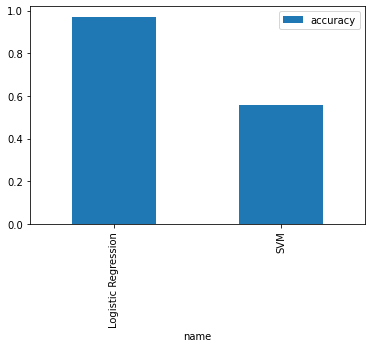

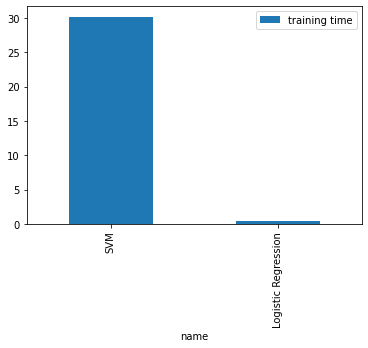

In [13]:
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

#evaluate the algorithms on their accuracy, training time and classificaion time and present the results on a graph

LRprediction=LR_clf.predict(tfid_x_test)
SVMpred=SVM_clf.predict(tfid_x_test)
LRaccuracy=accuracy_score(LRprediction, y_test)
SVMaccuracy=accuracy_score(SVMpred, y_test)

print("On a metric scale from 0 to 1, the accuracy of the Logistic Regression Algorithm is :", LRaccuracy )
print("On a metric scale from 0 to 1, the accuracy of the SVM Algorithm is :", SVMaccuracy)

print("\n ")

print("The time it took to train the Logistic Regression Algorithm is :", LR_training_time, "seconds")
print("The time it took to train the SVM Algorithm is :", SVM_training_time, "seconds")

print("\n ")
names = ["Logistic Regression","SVM"]
scores = [LRaccuracy,SVMaccuracy]
train_times=[LR_training_time, SVM_training_time]

df2=pd.DataFrame()
df2['name']=names
df2['accuracy']=scores

df2=df2.sort_values(by=['accuracy'],ascending=False)

df2.plot(kind='bar',x='name',y='accuracy')
plt.show()

print("\n")

df3=pd.DataFrame()
df3['name']=names
df3['training time']=train_times
df3=df3.sort_values(by=['training time'],ascending=False)
df3.plot(kind='bar',x='name',y='training time')
plt.show()

In [14]:
import pickle
#save the Logistic Regression model on a pickle file to use in the web application later
with open('model', 'wb') as f:
    pickle.dump(LR_clf, f)

In [15]:
def fake_news_det_LR(df):
    i=0
    exec_time=[]
    for data in df:
        start3=time.time()
        data=[data]
        vectorized_input_data = vect.transform(data)
        prediction = LR_clf.predict(vectorized_input_data)
        stop3=time.time()
        exec_time.append(stop3-start3)
        i=i+1
        if i>=999:
            break
    return exec_time

def fake_news_det_SVM(df):
    i=0
    exec_time=[]
    for data in df:
        start3=time.time()
        data=[data]
        vectorized_input_data = vect.transform(data)
        prediction = SVM_clf.predict(vectorized_input_data)
        stop3=time.time()
        exec_time.append(stop3-start3)
        i=i+1
        if i>=999:
            break
    return exec_time


In [16]:
ex_time=(fake_news_det_LR(x_test))
ex_time2=(fake_news_det_SVM(x_test))
total_time=0
total_time2=0
for i in range(len(ex_time)):
    total_time=total_time+ex_time[i]
    total_time2=total_time2+ex_time2[i]
av_ex_time_LR=total_time/len(ex_time)
av_ex_time_SVM=total_time2/len(ex_time2)
print("the average execution time using the Logistic Regression classifier is :", av_ex_time_LR , "seconds")
print("the average execution time using the SVM classifier is :", av_ex_time_SVM , "seconds")


the average execution time using the Logistic Regression classifier is : 0.000837318651430361 seconds
the average execution time using the SVM classifier is : 0.004377665581765237 seconds


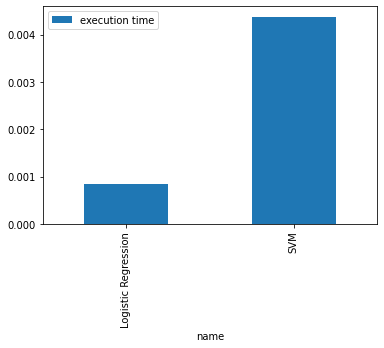

In [17]:
print("\n")

ex_times=[av_ex_time_LR, av_ex_time_SVM]

df4=pd.DataFrame()
df4['name']=names
df4['execution time']=ex_times
df4=df4.sort_values(by=['execution time'],ascending=True)
df4.plot(kind='bar',x='name',y='execution time')
plt.show()